# Imports

In [2]:
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

import nltk
nltk.download('punkt')

from scipy import stats
import numpy as np

# sentence similarity
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import numpy as np
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import nltk
from datetime import datetime

#from dtaidistance import dtw
#from dtaidistance import dtw_visualisation as dtwvis
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Triangle inequality

Consider three sequences $x := [0,1,1,2]$, $y := [0,1,2]$, and $z := [0,2,2]$. Let us calculate the distance between any two of these sequences.



In [ ]:
# https://math.stackexchange.com/questions/3388742/show-that-dynamic-time-warping-is-no-metric

x = [0,1,1,2]
y = [0,1,2]
z = [0,2,2]
print(dtw(x,z))
print(fastdtw(x,z)[0])
print(fastdtw(x,y)[0])
print(fastdtw(y,z)[0])
print(fastdtw(x,z)<= fastdtw(x,y)+fastdtw(y,z))


[[ 0. inf inf inf]
 [inf  0.  2.  4.]
 [inf  1.  1.  2.]
 [inf  2.  2.  2.]
 [inf  4.  2.  2.]]
2.0
0.0
1.0
False


# Translation

In [ ]:

#from deep_translator import GoogleTranslator
#to_translate = 'Bonjour.'
#translated = GoogleTranslator(source='auto', target='en').translate(to_translate)
#print(translated)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# DTW from scratch

In [45]:


# https://towardsdatascience.com/dynamic-time-warping-3933f25fcdd
def dtw(s, t):
    n, m = len(s), len(t)
    dtw_matrix = np.zeros((n + 1, m + 1))
    
    for i in range(n + 1):
        for j in range(m + 1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(s[i - 1] - t[j - 1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i - 1, j], dtw_matrix[i, j - 1], dtw_matrix[i - 1, j - 1]])
            dtw_matrix[i, j] = cost + last_min
            #print('cost: ', cost, 'lastmin: ', last_min, 'dtw: ', str(cost+last_min))
    return dtw_matrix

# Sentence similarity

In [ ]:


# constants
threshold = 2
window_size = 4
step_size = 2
start = 0

# initialise stemmers
porter = PorterStemmer()
lancaster = LancasterStemmer()
snowballEN = SnowballStemmer("english")

# stemming function
def stemSentence(sentence, language='english'):
    token_words=word_tokenize(sentence)
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(SnowballStemmer(language).stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

# reading files
file1 = open('english.txt')
file1 = (file1.readline()).lower()
file2 = open('text2.txt')
file2 = (file2.readline()).lower()

# tokenisation
tokenized1 = stemSentence(file1, 'english')
tokenized2 = stemSentence(file2, 'english')
tokenized1 = word_tokenize(tokenized1)
tokenized2 = word_tokenize(tokenized2)

# keywords
counts = Counter(again1)
keywords = []
for key in counts:
  if counts[key] >= int(threshold):
    keywords.append(key)
    #print(key, counts[key])
keywords = [word for word in keywords if word not in ('and', '.', 'the')]
print(keywords)

# converting the code into binary
# first binary sequence
binary1 = []
for word in tokenized1:
  if word in keywords:
    binary1.append(1)
  else:
    binary1.append(0)
print(binary1)

# second binary sequence
binary2 = []
for word in tokenized2:
  if word in keywords:
    binary2.append(1)
  else:
    binary2.append(0)
print(binary2)

# initialise empty sequences
sequence1 = []
sequence2 = []

# creating first sequence
start_time = datetime.now()
while start+step_size <= len(binary1):
  windows = binary1[start:start+window_size]
  sequence1.append(sum(windows))
  start += step_size
#print(sequence1)

# creating second sequence
start = 0
while start+step_size <= len(binary1):
  windows = binary2[start:start+window_size]
  sequence2.append(sum(windows))
  start += step_size
end_time = datetime.now()
#print(sequence2)

x = np.array(sequence1)
y = np.array(sequence2)
distance, path = fastdtw(x, y, dist=euclidean, radius = np.maximum(len(x),len(y)))

print(distance)
print('Time of fast dtw {}'.format(end_time-start_time))
print('Path: {}'.format(path))

# full dtw for comparison
start_time = datetime.now()
print('\nFull DTW cost matrix:\n {}'.format(dtw(x,y)))
end_time = datetime.now()
print('\nTime of full dtw {}'.format(end_time-start_time))

# print whole matrix
#np.set_printoptions(threshold=np.inf)
#print(dtw(x,y))

# revert to default settings
np.set_printoptions(threshold=1000)
#print(dtw(x,y))


NameError: ignored

In [ ]:
a = [1,3,5]
b = [2,2,8]

np.set_printoptions(threshold=np.inf)
print(dtw(a,b))
np.set_printoptions(threshold=1000)

distance, path = fastdtw(a, b, dist=euclidean, radius = np.maximum(len(a),len(b)))
print(distance)

[[ 0. inf inf inf]
 [inf  1.  2.  9.]
 [inf  2.  2.  7.]
 [inf  5.  5.  5.]]
5.0


# dtaidistance library

In [ ]:
pip install dtaidistance

     |████████████████████████████████| 535 kB 7.6 MB/s 


<function distance_matrix at 0x7f25bee293b0>


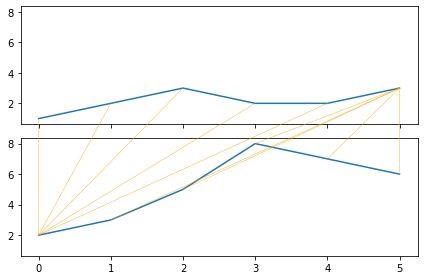

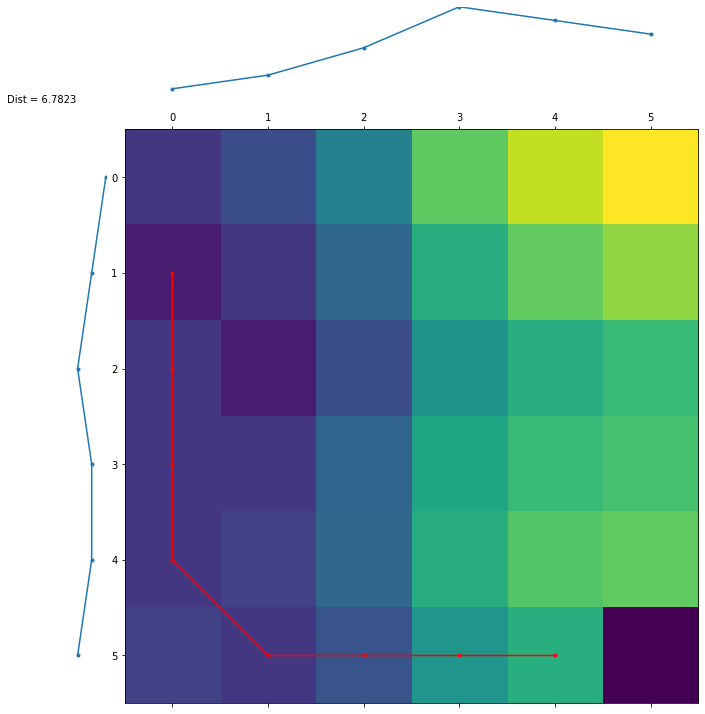

In [ ]:
#s1 = np.array(sequence1)
#s2 = np.array(sequence2)
s1 = np.array([1,2,3, 2, 2, 3])
s2 = np.array([2,3,5, 8, 7, 6])
distance = dtw.distance(s1, s2)
path = dtw.warping_path(s1, s2)
dtwvis.plot_warping(s1, s2, path)

x = np.arange(0, 20, .5)
#for idx in range(len(s2)):
#    if random.random() < 0.05:
#        s2[idx] += (random.random() - 0.5) / 2
d, paths = dtw.warping_paths(s1, s2, window=25, psi=1)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path) #dtwvis.plot_warpingpaths(s1, s2, paths, best_path)
print(dtw.distance_matrix)

# python-dtw

In [ ]:
pip install dtw-python

     |████████████████████████████████| 580 kB 7.4 MB/s 


In [ ]:
# source: https://dynamictimewarping.github.io/python/
import numpy as np

## A noisy sine wave as query
idx = np.linspace(0,6.28,num=100)
query = np.sin(idx) + np.random.uniform(size=100)/10.0

## A cosine is for template; sin and cos are offset by 25 samples
template = np.cos(idx)

## Find the best match with the canonical recursion formula
from dtw import *
alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(query, template, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

## See the recursion relation, as formula and diagram
print(rabinerJuangStepPattern(6,"c"))
rabinerJuangStepPattern(6,"c").plot()




import matplotlib as plt
from dtw import *
#alignment = dtw(s1, s2, keep_internals=True)
#alignment.plot(type="threeway")
#print(alignment.costMatrix)
#print(alignment.normalizedDistance) # what is this normalised distance thing?
#print(alignment.distance)
#fig = plt.figure.Figure(figsize = (10,6))
#dtw(s1, s2, keep_internals=True, step_pattern=rabinerJuangStepPattern(6, "c")).plot(type="twoway",offset=-2)

TypeError: ignored

# Saving as a png

In [ ]:
#plot.figure.savefig("hewwo.png")
#from IPython.display import Image
#Image('hewwo.png')

# fastdtw

In [ ]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

x = np.array([1, 2, 3])
y = np.array([2, 2, 2, 3, 4])

distance, path = fastdtw(x, y, dist=euclidean, radius = 100)

print(distance)
print(path)
np.set_printoptions(threshold=np.inf)
print(dtw(x,y))
np.set_printoptions(threshold=1000)

2.0
[(0, 0), (1, 1), (1, 2), (2, 3), (2, 4)]
[[ 0. inf inf inf inf inf]
 [inf  1.  2.  3.  5.  8.]
 [inf  1.  1.  1.  2.  4.]
 [inf  2.  2.  2.  1.  2.]]


# DTW for KNN

Imports

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import numpy as np
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
from sklearn.metrics import classification_report, confusion_matrix

Generating some dummy features

In [ ]:
# First feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']

# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

Preprocessing

In [ ]:
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)

temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)
print(weather_encoded, temp_encoded)


def levels2binary(input):
  # removing duplicates by converting to dictionary and back
  input = list(dict.fromkeys(input))
  i=0
  while i<len(input):
    input[i] = i
    i+=1
  return input

print(levels2binary(weather))
print(levels2binary(temp))

[2 2 0 1 1 1 0 2 2 1 2 0 0 1] [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
[0, 1, 2]
[0, 1, 2]


Algorithm itself

In [ ]:
x = np.array(temp_encoded)
y = np.array(label)

distance, path = fastdtw(x, y, dist=euclidean)
print(distance)

def dtw(x, y):
  result = fastdtw(x, y)[0]
  return result

# Initiating the model
model = KNeighborsClassifier(n_neighbors=3, metric = dtw)

# Train the model using the training sets
model.fit(temp_encoded.reshape(-1,1),label)

#Predict output
predicted= model.predict([[0]])
print(predicted)

9.0
[1]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

iris = pd.read_csv('iris.csv').to_numpy()
X = iris[:, :-1]
y = iris[:,-1]

neigh = KNeighborsClassifier()
neigh.fit(X, y)
neigh.score(X,y)

0.9666666666666667

Does not work and is not sourced

In [ ]:
def dtw_distance(self, ts_a, ts_b, d = lambda x,y: abs(x-y)):
# accepts 2D numpy arrays
# DistanceMetric default = abs(x-y)
        # cost matrix
        ts_a, ts_b = np.array(ts_a), np.array(ts_b)
        M, N = len(ts_a), len(ts_b)
        cost = float("inf") * np.ones((M, N))

        # Initialize the first row and column
        cost[0, 0] = d(ts_a[0], ts_b[0])
        for i in xrange(1, M):
            cost[i, 0] = cost[i-1, 0] + d(ts_a[i], ts_b[0])

        for j in xrange(1, N):
            cost[0, j] = cost[0, j-1] + d(ts_a[0], ts_b[j])

        # Populate rest of cost matrix within window
        for i in xrange(1, M):
            for j in xrange(max(1, i - max_warping_window),
                            min(N, i + max_warping_window)):
                choices = cost[i - 1, j - 1], cost[i, j-1], cost[i-1, j]
                cost[i, j] = min(choices) + d(ts_a[i], ts_b[j])

        # Return DTW distance given window 
        return cost[-1, -1]

def dist_matrix(x, y): 
        else:
            x_s = np.shape(x)
            y_s = np.shape(y)
            dm = np.zeros((x_s[0], y_s[0])) 
            dm_size = x_s[0]*y_s[0]
            
            p = ProgressBar(dm_size)
        
            for i in xrange(0, x_s[0]):
                for j in xrange(0, y_s[0]):
                    dm[i, j] = self._dtw_distance(x[i, ::step],
                                                  y[j, ::step])
                    # Update progress bar
                    dm_count += 1
                    p.animate(dm_count)
        
            return dm
def predict(x):
        
        dist_matrix(x, x)

        # Identify the k nearest neighbors
        knn_idx = dm.argsort()[:, :n_neighbors]

        # Identify k nearest labels
        knn_labels = l[knn_idx]
        
        # Model Label
        mode_data = mode(knn_labels, axis=1)
        mode_label = mode_data[0]
        mode_proba = mode_data[1]/n_neighbors

        return mode_label.ravel(), mode_proba.ravel()

SyntaxError: ignored

In [ ]:
conf_mat = confusion_matrix(label, y_test[::10])

fig = plt.figure(figsize=(6,6))
width = np.shape(conf_mat)[1]
height = np.shape(conf_mat)[0]

res = plt.imshow(np.array(conf_mat), cmap=plt.cm.summer, interpolation='nearest')
for i, row in enumerate(conf_mat):
    for j, c in enumerate(row):
        if c>0:
            plt.text(j-.2, i+.1, c, fontsize=16)
            
cb = fig.colorbar(res)
plt.title('Confusion Matrix')
plt.xticks(range(6), [l for l in labels.values()], rotation=90)
plt.yticks(range(6), [l for l in labels.values()])

NameError: ignored

# DTW for speech recognition

Audio files

In [29]:
import IPython.display as ipd
# https://cloudconvert.com/mp4-to-wav
# https://online-video-cutter.com/
# https://musicinformationretrieval.com/ipython_audio.html
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

ipd.Audio('one_converted.wav')

In [30]:
ipd.Audio('two_converted.wav')

In [31]:
ipd.Audio('wait.wav')

In [32]:
# https://pages.databricks.com/rs/094-YMS-629/images/dynamic-time-warping-background.html?_ga=2.17383103.769059236.1642853783-1006402565.1640009003
# https://stackoverflow.com/questions/44812553/how-to-convert-a-24-bit-wav-file-to-16-or-32-bit-files-in-python3
# DAC ADC

# in case of wrong subtype
#import soundfile
#data, samplerate = soundfile.read('two_raw.wav')
#soundfile.write('two_converted.wav', data, samplerate, subtype='PCM_16')

# reading files
fs1, one = wavfile.read("one_converted.wav")
fs2, two = wavfile.read("two_converted.wav")  # numpy array 
fs3, wait = wavfile.read("wait.wav")

# Take the max values along axis 
one = np.amax(one, axis=1)
two = np.amax(two, axis=1)
wait = np.amax(wait, axis=1)

#Distance between clip 1 and clip 2
print(fastdtw(one, two)[0])
print(fastdtw(one, wait)[0])
print(fastdtw(two, wait)[0])

54795739.0
194738879.0
183523371.0


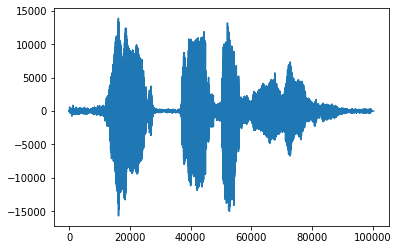

In [33]:
plt.plot(wait)

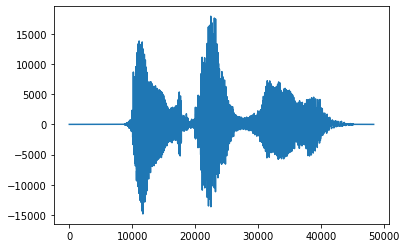

In [35]:
plt.plot(two)

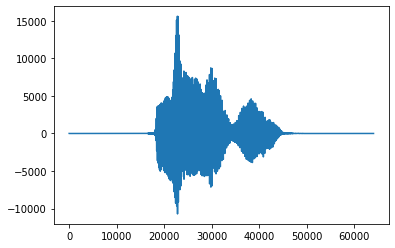

In [34]:
plt.plot(one)

# Signature recognition